# **Part 1 :**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Mini/SwissRollData'
file_path2 = '/content/drive/MyDrive/Mini/GMMData'

mat_data = scipy.io.loadmat(file_path)
data_training_X = mat_data['Yt']
data_training_C = mat_data['Ct']
data_validation_X = mat_data['Yv']
data_validation_C = mat_data['Cv']

In [ ]:
def pickRandomBach(X,C,batchSize):
  random_indexes = np.random.choice(X.shape[1],size=batchSize,replace=False)
  X_batch = X[:,random_indexes]
  C_batch = C[:,random_indexes]
  return X_batch , C_batch

In [ ]:
def shuffle_and_batch(X, C, batchSize):
    # Number of data points
    num_data = X.shape[1]

    # Generate a shuffled array of indices
    indices = np.arange(num_data)
    np.random.shuffle(indices)

    # Process in batches
    for start_idx in range(0, num_data, batchSize):
        end_idx = min(start_idx + batchSize, num_data)
        batch_indices = indices[start_idx:end_idx]

        X_batch = X[:, batch_indices]
        C_batch = C[:, batch_indices]

        yield X_batch, C_batch

In [ ]:
def pickRandomBachForTraninig(X,C,batchSize):
    num_samples = X.shape[1]

    # Shuffle indices
    indices = np.arange(num_samples)
    np.random.shuffle(indices)

    # Calculate the number of batches
    num_batches = (num_samples + batchSize - 1) // batchSize

    for i in range(num_batches):
        # Get the batch indices
        start_idx = i * batchSize
        end_idx = min(start_idx + batchSize, num_samples)
        batch_indices = indices[start_idx:end_idx]

        # Yield the current batch
        X_batch = X[:, batch_indices]
        C_batch = C[:, batch_indices]
        yield X_batch, C_batch


In [ ]:
def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - np.tanh(z) ** 2

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

In [ ]:
def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / np.sum(expZ, axis=0, keepdims=True)

In [ ]:
def compute_loss_for_testing(Z, C):
    m = C.shape[1]
    Z = softmax(Z)
    loss = -np.sum(C * np.log(Z + 1e-8)) / m
    return loss

In [ ]:
def compute_loss(Z, C):
    m = C.shape[1]
    loss = -np.sum(C * np.log(Z + 1e-8)) / m
    return loss

In [ ]:
def test_ENV_loss():
    batchSize = 4
    X , C = pickRandomBach(data_training_X,data_training_C,batchSize)
    X = np.vstack([X, np.ones((1, X.shape[1]))])
    W = np.random.randn(2, 2 + 1)
    print("X",X)
    print("W",W)
    print("C",C)
    Z = W.dot(X)
    softZ = softmax(Z)
    print("softZ",softZ)

    loss = compute_loss(softZ, C)
    print("loss",loss)
test_ENV_loss()

X [[-0.92286688 -0.9511193   0.46316141 -0.73307765]
 [ 0.26330492 -0.38196778  0.19167833 -0.15323861]
 [ 1.          1.          1.          1.        ]]
W [[-0.89459171 -0.1953615  -0.17026155]
 [-0.90988939 -1.19947393  0.67416166]]
C [[0. 0. 1. 1.]
 [1. 1. 0. 0.]]
softZ [[0.35568249 0.22399908 0.3441462  0.26707646]
 [0.64431751 0.77600092 0.6558538  0.73292354]]
loss 0.7700185313030227


In [ ]:
def softmax_regression_gradient_by_W(X ,W, C):
    Z = W.dot(X)
    m = Z.shape[1]
    probabilities = softmax(Z)
    probabilities -= C
    gradient = np.dot(probabilities, X.T) / m
    return gradient

k	error order 1		error order 2
1	0.0071328582878016356	4.04986386959294e-06
2	0.003565417999722431	1.0137877564098119e-06
3	0.0017824556601597763	2.5355417676564684e-07
4	0.0008911644258491336	6.337285762825218e-08
5	0.0004455663531968135	1.5826700838772467e-08
6	0.0002227792105826687	3.947334903386945e-09
7	0.00011138861365145303	9.820273483285291e-10
8	5.5694058898492216e-05	2.43086439866147e-10


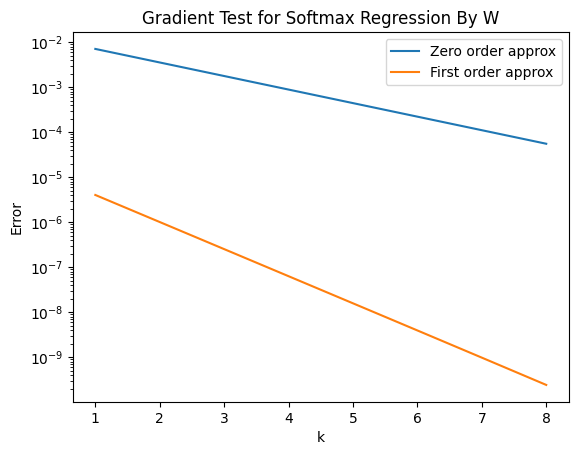

In [ ]:
def gradient_test_byW(function, gradient):
  # Gradient Check Setup
  batchSize = 2
  EPSILON = 0.1
  outputnum = 2

  X , C =pickRandomBach(data_training_X,data_training_C,batchSize)
  X = np.vstack([X, np.ones((1, X.shape[1]))])

  W = np.random.randn(outputnum, X.shape[0])


  d = np.random.randn(*W.shape)

  def F(W):
      Z = W.dot(X)
      return function(Z, C)

  def g_F(W):
      return gradient(X, W, C)


  F0 = F(W)
  g0 = g_F(W)
  y0 = np.zeros(8)
  y1 = np.zeros(8)

  print("k\terror order 1\t\terror order 2")

  for k in range(1, 9):
      epsk = EPSILON * (0.5 ** k)
      Fk = F(W + epsk * d)
      F1 = F0 + epsk * np.sum(g0 * d)
      y0[k-1] = abs(Fk - F0)
      y1[k-1] = abs(Fk - F1)
      print(f"{k}\t{y0[k-1]}\t{y1[k-1]}")

  # Plotting
  plt.semilogy(range(1, 9), y0, label="Zero order approx")
  plt.semilogy(range(1, 9), y1, label="First order approx")
  plt.legend()
  plt.title("Gradient Test for Softmax Regression By W")
  plt.xlabel("k")
  plt.ylabel("Error")
  plt.show()

gradient_test_byW(compute_loss_for_testing,softmax_regression_gradient_by_W)

In [ ]:
def softmax_regression_gradient_by_X(X, W, C):
    m = X.shape[1]
    A = np.dot(W, X)
    prob = softmax(A)
    P = prob - C
    grad_X = np.dot(W.T, P) / m
    return grad_X

k	error order 1		error order 2
1	0.01520181139080834	0.0008217624714077498
2	0.007395650461419434	0.00020562600171913914
3	0.0036464374683322642	5.142523848200575e-05
4	0.0018103644886064973	1.2858373681368107e-05
5	0.0009019678916528662	3.2148341904125743e-06
6	0.00045018026639032094	8.037376590941392e-07
7	0.00022488920240437693	2.0093803865250948e-07
8	0.00011239436716792284	5.0234985060626514e-08


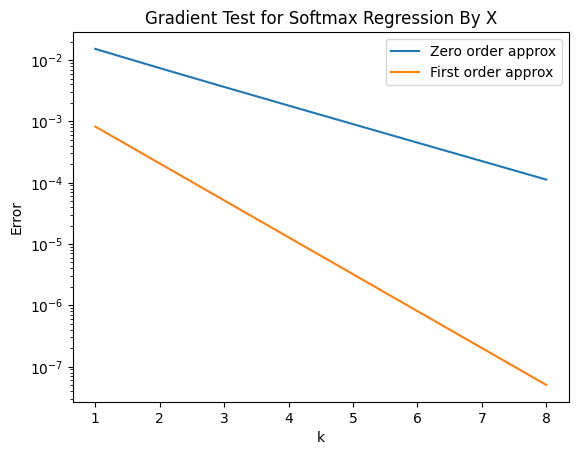

In [ ]:
def gradient_test_byX(function, gradient):
  # Gradient Check Setup
  batchSize = 2
  EPSILON = 0.1
  outputnum = 2

  X , C =pickRandomBach(data_training_X,data_training_C,batchSize)

  W1 = np.random.randn(2, 2)

  d = np.random.randn(*X.shape)

  def F(X):
      Z = W1.dot(X)
      return function(Z , C)

  def g_F(X):
      return gradient( X , W1 , C)


  F0 = F(X)
  g0 = g_F(X)
  y0 = np.zeros(8)
  y1 = np.zeros(8)

  print("k\terror order 1\t\terror order 2")

  for k in range(1, 9):
      epsk = EPSILON * (0.5 ** k)
      Fk = F(X + epsk * d)
      F1 = F0 + epsk * np.sum(g0 * d)
      y0[k-1] = abs(Fk - F0)
      y1[k-1] = abs(Fk - F1)
      print(f"{k}\t{y0[k-1]}\t{y1[k-1]}")

  # Plotting
  plt.semilogy(range(1, 9), y0, label="Zero order approx")
  plt.semilogy(range(1, 9), y1, label="First order approx")
  plt.legend()
  plt.title("Gradient Test for Softmax Regression By X")
  plt.xlabel("k")
  plt.ylabel("Error")
  plt.show()

gradient_test_byX(compute_loss_for_testing,softmax_regression_gradient_by_X)

In [ ]:
def calculate_success_percentage(Z, C):
    predicted_labels = np.argmax(Z, axis=0)  # Get the predicted class as the one with the highest probability
    true_labels = np.argmax(C, axis=0)  # Directly use C as it is already class indices
    correct_predictions = np.sum(predicted_labels == true_labels)  # Count how many predictions match the true labels
    success_percentage = correct_predictions / Z.shape[1] * 100.0  # Calculate percentage and convert to a percentage
    return success_percentage

In [ ]:
def least_squares_loss(X, W, C):
    # Calculate the least squares loss
    N = len(C)
    loss = (1/N) * np.sum((np.dot(W, X) - C)**2)
    return loss

def least_squares_gradient(X, W, C):
    # Calculate the gradient for least squares regression
    N = len(C)
    gradient = (2/N) * np.dot((np.dot(W, X) - C),X.T)
    return gradient

k	error order 1		error order 2
1	0.05618653930397266	0.0024602610536370584
2	0.028708334915395595	0.0006150652634091536
3	0.014507933773549864	0.00015376631585262146
4	0.007292408465737976	3.8441578963155365e-05
5	0.003655814627609777	9.610394740899864e-06
6	0.0018303099124901134	2.4025986851139436e-06
7	0.0009157556059162797	6.00649671333997e-07
8	0.00045802796537608437	1.5016241783349926e-07


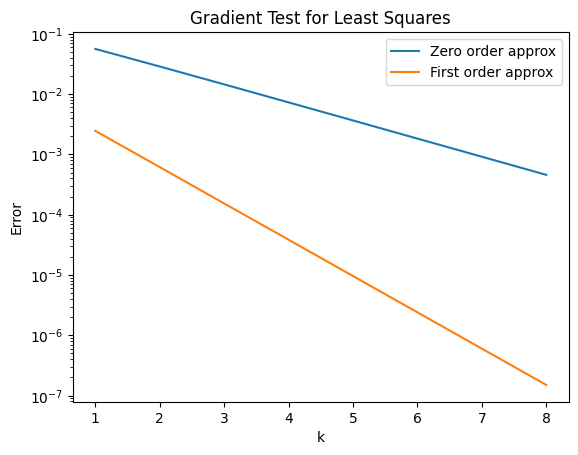

In [ ]:
def gradient_test_LS(function, gradient):
  # Gradient Check Setup
  batchSize = 2
  EPSILON = 0.1
  outputnum = 2

  X , C =pickRandomBach(data_training_X,data_training_C,batchSize)
  X = np.vstack([X, np.ones((1, X.shape[1]))])
  W = np.random.randn(outputnum, X.shape[0])
  d = np.random.randn(*W.shape)

  def F(W):
      return function(X, W, C)

  def g_F(W):
      return gradient(X, W, C)

  F0 = F(W)
  g0 = g_F(W)
  y0 = np.zeros(8)
  y1 = np.zeros(8)

  print("k\terror order 1\t\terror order 2")

  for k in range(1, 9):
      epsk = EPSILON * (0.5 ** k)
      Fk = F(W + epsk * d)
      F1 = F0 + epsk * np.sum(g0 * d)
      y0[k-1] = abs(Fk - F0)
      y1[k-1] = abs(Fk - F1)
      print(f"{k}\t{y0[k-1]}\t{y1[k-1]}")

  # Plotting
  plt.semilogy(range(1, 9), y0, label="Zero order approx")
  plt.semilogy(range(1, 9), y1, label="First order approx")
  plt.legend()
  plt.title("Gradient Test for Least Squares")
  plt.xlabel("k")
  plt.ylabel("Error")
  plt.show()

gradient_test_LS(least_squares_loss, least_squares_gradient)

In [ ]:
def SGD_with_momentum(network, gradients, velocity, learning_rate, momentum):
    for key in network.keys():
        velocity[key] = momentum * velocity[key] - learning_rate * gradients[key]
        network[key] += velocity[key]

In [ ]:
def testSGD(lossFunction , gradientLossFunction):
  batchSize = 2
  EPSILON = 0.1
  outputnum = 2
  network = {}

  X , C =pickRandomBach(data_training_X,data_training_C,batchSize)
  X = np.vstack([X, np.ones((1, X.shape[1]))])
  W1 = np.random.randn(outputnum, X.shape[0])
  network = {'W1' : W1}
  velocity = {'W1' :np.zeros_like(W1)}

  success_percentages_list = []
  success_percentages = 0
  losses = []

  # Set hyperparameters
  learning_rate = 0.05
  momentum = 0.8
  epochs = 80
  batch_Size = 20

  for i in range(epochs):
    W1 = network['W1']
    X , C =pickRandomBach(data_training_X,data_training_C,batchSize)
    X = np.vstack([X, np.ones((1, X.shape[1]))])
    gradients = {'W1': least_squares_gradient(X, W1, C)}

    SGD_with_momentum(network, gradients, velocity, learning_rate, momentum)

    losses.append(least_squares_loss(X, W1, C))

    success_percentages_list.append(calculate_success_percentage(W1.dot(X), C))


  # Plot the loss over epochs
  plt.plot(range(epochs), losses)
  plt.title("Losses over Epochs (SGD with Momentum) with LS")
  plt.xlabel("Epoch")
  plt.ylabel("losses")
  plt.show()

    # Plot the success percentages over epochs
  plt.plot(range(epochs), success_percentages_list)
  plt.title("success percentages over Epochs (SGD with Momentum) with LS")
  plt.xlabel("Epoch")
  plt.ylabel("success")
  plt.show()


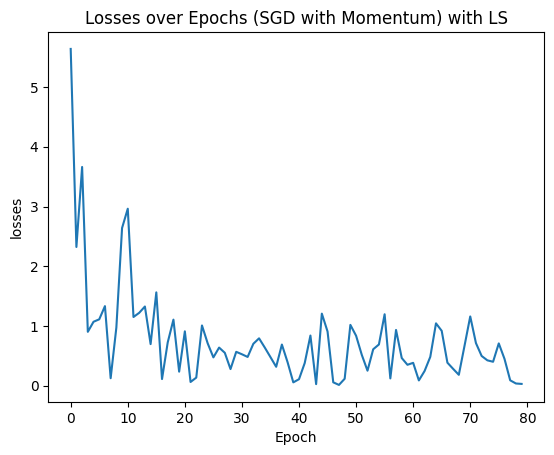

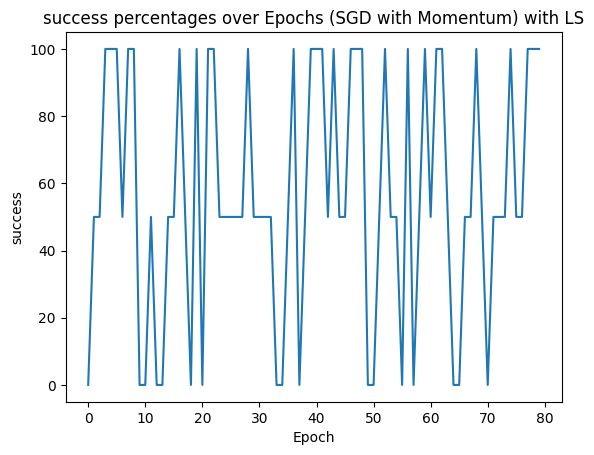

In [ ]:
# test the sgd with mumentum :

testSGD(least_squares_loss,least_squares_gradient)

# **Part 2**

In [ ]:
def initialize_network(layer_sizes, res_places):
    network = {}
    for i in res_places:
      if (layer_sizes[i] != layer_sizes[i+ 1]):
        return {}
    for i in range(1, len(layer_sizes)):

        if i-1 in res_places:
            # For ResNet: W1 and W2 weights
            network['W' + str(i) + '_res1'] = np.random.randn(layer_sizes[i-1], layer_sizes[i] + 1) / layer_sizes[i-1]
            network['W' + str(i) + '_res2'] = np.random.randn(layer_sizes[i] , layer_sizes[i]) / layer_sizes[i-1]
        else:
          network['W' + str(i)] = np.random.randn(layer_sizes[i], layer_sizes[i-1] + 1) / (layer_sizes[i])


    return network

In [ ]:
def single_step_forward_class(X, W, activation='relu'):
    activation_func = relu if activation == 'relu' else tanh

    Z = W.dot(X)
    A = activation_func(Z)
    return A

**the Jacobian test by W for classic net :**

In [ ]:
def JacobianTByW(X, W, u, activation='relu'):

    activationD_func = relu_derivative if activation == 'relu' else tanh_derivative

    Z = W.dot(X)
    A = activationD_func(Z)

    return np.dot(np.multiply(A,u),X.T)

k	error order 1 			 error order 2
1	0.32872642491414195	0.007893905098864229
2	0.16224035882785626	0.0018240989202173985
3	0.0806471482612996	0.0004390183074802767
4	0.04021183704199949	0.00010777206508971737
5	0.02007873771040858	2.6705221953804426e-05
6	0.010032663482288706	6.647238061319172e-06
7	0.005014666340170448	1.6582180566437899e-06
8	0.002506918169290273	4.141082334818691e-07


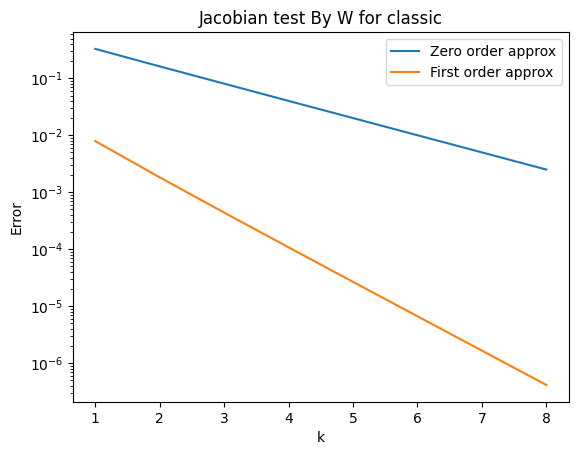

In [ ]:
def jacobian_test_by_W_for_classic():
  # Jacobian Check Setup
  num_classes = 3
  input_size = 2
  num_features = 5
  EPSILON = 0.1
  W = np.random.randn(num_classes, num_features + 1)
  X = np.random.randn(num_features, input_size)
  X = np.vstack([X, np.ones((1, X.shape[1]))])
  d = np.random.randn(num_classes, num_features + 1)
  u = np.random.randn(num_classes, input_size)

  def F(W):
      return single_step_forward_class(X, W, tanh)

  def g_F(W):
      return np.dot(u.flatten(), F0.flatten())

  F0 = F(W)
  g0 = g_F(W)
  grad_g0 = JacobianTByW(X, W, u, tanh)

  y0 = np.zeros(8)
  y1 = np.zeros(8)


  print("k\terror order 1 \t\t\t error order 2")
  for k in range(1, 9):
      epsk = EPSILON * (0.5 ** k)
      fk = F(W + (epsk * d))
      gk = np.dot(fk.flatten(), u.flatten())
      g1 = g0 + (epsk * (np.dot(d.flatten(),grad_g0.flatten())))
      y0[k - 1] = abs(gk - g0)
      y1[k - 1] = abs(gk - g1)
      print(f"{k}\t{y0[k-1]}\t{y1[k-1]}")

  # Plotting
  plt.semilogy(range(1, 9), y0, label="Zero order approx")
  plt.semilogy(range(1, 9), y1, label="First order approx")
  plt.legend()
  plt.title("Jacobian test By W for classic")
  plt.xlabel("k")
  plt.ylabel("Error")
  plt.show()

jacobian_test_by_W_for_classic()

**the Jacobian test by X for classic:**

In [ ]:
def JacobianTByX(X, W, u, activation='relu'):

    activationD_func = relu_derivative if activation == 'relu' else tanh_derivative

    Z = W.dot(X)
    A = activationD_func(Z)

    return np.dot(W.T, np.multiply(A,u))

k	error order 1 			 error order 2
1	0.036494472973244485	0.001707242936525466
2	0.018679771192799066	0.00042108676208585383
3	0.009445951624244664	0.00010447735319785156
4	0.00474919930383344	2.601518488776211e-05
5	0.002381116768958469	6.490475402132212e-06
6	0.0011921826872152153	1.620934965140819e-06
7	0.0005964967890059736	4.0502208420445385e-07
8	0.00029834967655395506	1.0122899107845029e-07


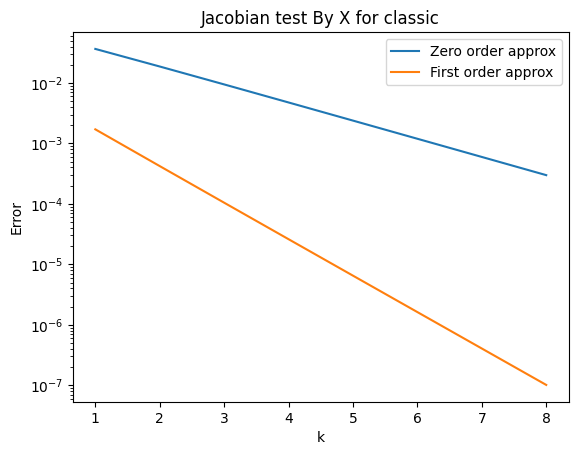

In [ ]:
def jacobian_test_by_X_for_classic():
  # Jacobian Check Setup
  num_classes = 3
  input_size = 2
  num_features = 5
  EPSILON = 0.1
  W = np.random.randn(num_classes, num_features + 1)
  X = np.random.randn(num_features, input_size)
  X = np.vstack([X, np.ones((1, X.shape[1]))])
  d = np.random.randn(num_features + 1, input_size)
  u = np.random.randn(num_classes, input_size)

  def F(X):
      return single_step_forward_class(X, W, tanh)

  def g_F(X):
      return np.dot(u.flatten(), F0.flatten())

  F0 = F(X)
  g0 = g_F(X)
  grad_g0 = JacobianTByX(X, W, u, tanh)

  y0 = np.zeros(8)
  y1 = np.zeros(8)


  print("k\terror order 1 \t\t\t error order 2")
  for k in range(1, 9):
      epsk = EPSILON * (0.5 ** k)
      fk = F(X + (epsk * d))
      gk = np.dot(fk.flatten(), u.flatten())
      g1 = g0 + (epsk * (np.dot(d.flatten(),grad_g0.flatten())))
      y0[k - 1] = abs(gk - g0)
      y1[k - 1] = abs(gk - g1)
      print(f"{k}\t{y0[k-1]}\t{y1[k-1]}")

  # Plotting
  plt.semilogy(range(1, 9), y0, label="Zero order approx")
  plt.semilogy(range(1, 9), y1, label="First order approx")
  plt.legend()
  plt.title("Jacobian test By X for classic")
  plt.xlabel("k")
  plt.ylabel("Error")
  plt.show()

jacobian_test_by_X_for_classic()

# residual neural network

In [ ]:
def single_step_forward_res(X, W1, W2, activation='relu'):
    activation_func = relu if activation == 'relu' else tanh

    #step 1 :
    Z_res1 = W1.dot(X)
    A_res1 = activation_func(Z_res1)

    #step 2 :
    Z_res2 = W2.dot(A_res1)

    A = X[:-1, :]

    Z_res2 += A

    return Z_res2

In [ ]:
def JacobianT_W1_Res(X, W1, W2, u, activation='relu'):
    activationD_func = relu_derivative if activation == 'relu' else tanh_derivative

    Z_res1 = W1.dot(X)
    A_res1 = activationD_func(Z_res1)

    Z_u = W2.T.dot(u)
    Z_res2 = np.multiply(A_res1,Z_u)

    return Z_res2.dot(X.T)

k	error order 1 			 error order 2
1	0.1927618452654727	0.027051691017091706
2	0.10307047379223544	0.006836294349046312
3	0.05323408605037905	0.001719298020262272
4	0.02704553154996514	0.00043116048535551954
5	0.013630385627473096	0.00010796039018678982
6	0.006842161435725913	2.7011573104473996e-05
7	0.0034278309151147823	6.755589300411202e-06
8	0.001715604017168637	1.68923503895968e-06


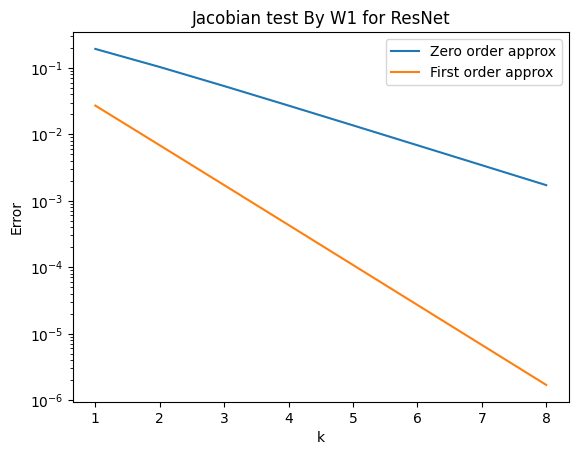

In [ ]:
def jacobian_test_res_w1():
  # Jacobian Check Setup
  num_classes = 3
  input_size = 2
  num_features = num_classes
  EPSILON = 0.1
  W1 = np.random.randn(num_classes, num_features + 1)
  W2 = np.random.randn(num_classes, num_features )
  X = np.random.randn(num_features, input_size)
  X = np.vstack([X, np.ones((1, X.shape[1]))])
  d = np.random.randn(num_classes, num_features + 1)
  u = np.random.randn(num_classes, input_size)

  def F(W1):
      return single_step_forward_res(X, W1, W2, tanh)

  def g_F(W1):
      return np.dot(u.flatten(), F0.flatten())

  F0 = F(W1)
  g0 = g_F(W1)
  grad_g0 = JacobianT_W1_Res(X, W1, W2, u, tanh)

  y0 = np.zeros(8)
  y1 = np.zeros(8)

  print("k\terror order 1 \t\t\t error order 2")
  for k in range(1, 9):
      epsk = EPSILON * (0.5 ** k)
      fk = F(W1 + (epsk * d))
      gk = np.dot(fk.flatten(), u.flatten())
      g1 = g0 + (epsk * (np.dot(d.flatten(),grad_g0.flatten())))
      y0[k - 1] = abs(gk - g0)
      y1[k - 1] = abs(gk - g1)
      print(f"{k}\t{y0[k-1]}\t{y1[k-1]}")

  # Plotting
  plt.semilogy(range(1, 9), y0, label="Zero order approx")
  plt.semilogy(range(1, 9), y1, label="First order approx")
  plt.legend()
  plt.title("Jacobian test By W1 for ResNet")
  plt.xlabel("k")
  plt.ylabel("Error")
  plt.show()

jacobian_test_res_w1()

**the Jacobian test by W2 for ResNet:**

In [ ]:
def JacobianT_W2_Res(X, W1, W2, u, activation='relu'):
    activation_func = relu if activation == 'relu' else tanh

    Z_res1 = W1.dot(X)
    A = activation_func(Z_res1)
    A = A.T

    return u.dot(A)

k	error order 1 			 error order 2
1	0.09519766889974912	1.1102230246251565e-16
2	0.04759883444987445	1.6653345369377348e-16
3	0.02379941722493706	2.220446049250313e-16
4	0.011899708612469861	1.2212453270876722e-15
5	0.005949854306233737	6.106226635438361e-16
6	0.0029749271531174792	3.3306690738754696e-16
7	0.0014874635765577127	8.881784197001252e-16
8	0.0007437317882790229	2.7755575615628914e-16


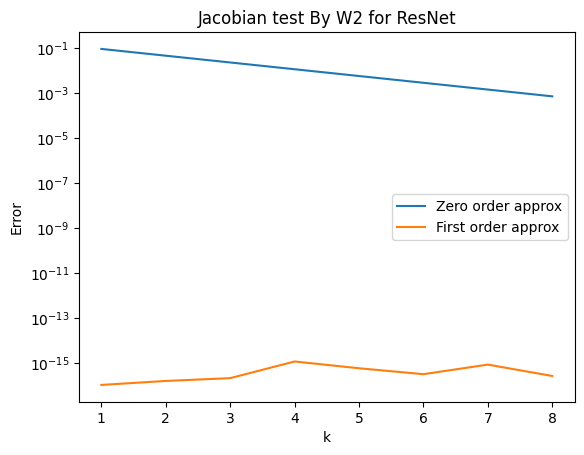

In [ ]:
def jacobian_test_res_w2():
  # Jacobian Check Setup
  num_classes = 3
  input_size = 2
  num_features = num_classes
  EPSILON = 0.1
  X = np.random.randn(num_features, input_size)
  X = np.vstack([X, np.ones((1, X.shape[1]))])
  W1 = np.random.randn(num_features, num_classes + 1)
  W2 = np.random.randn(num_features, num_classes)
  d = np.random.randn(num_features , num_classes)
  u = np.random.randn(num_features, input_size)


  def F(W2):
      return single_step_forward_res(X, W1, W2, tanh)

  def g_F(W2):
      return np.dot(u.flatten(), F0.flatten())

  F0 = F(W2)
  g0 = g_F(W2)
  grad_g0 = JacobianT_W2_Res(X, W1, W2, u, tanh)

  y0 = np.zeros(8)
  y1 = np.zeros(8)


  print("k\terror order 1 \t\t\t error order 2")
  for k in range(1, 9):
      epsk = EPSILON * (0.5 ** k)
      fk = F(W2 + (epsk * d))
      gk = np.dot(fk.flatten(), u.flatten())
      g1 = g0 + (epsk * (np.dot(d.flatten(),grad_g0.flatten())))
      y0[k - 1] = abs(gk - g0)
      y1[k - 1] = abs(gk - g1)
      print(f"{k}\t{y0[k-1]}\t{y1[k-1]}")

  # Plotting
  plt.semilogy(range(1, 9), y0, label="Zero order approx")
  plt.semilogy(range(1, 9), y1, label="First order approx")
  plt.legend()
  plt.title("Jacobian test By W2 for ResNet")
  plt.xlabel("k")
  plt.ylabel("Error")
  plt.show()

jacobian_test_res_w2()

**the Jacobian test by X for ResNet:**

In [ ]:
def JacobianT_X_Res(X, W1, W2, u, activation='relu'):
    activationD_func = relu_derivative if activation == 'relu' else tanh_derivative

    #step 1 :
    Z_res1 = W1.dot(X)
    A_res1 = activationD_func(Z_res1)


    #step 2 :
    Z_2 = np.dot(W2.T,u)
    A_res2 = np.multiply(A_res1,Z_2)

    #step 3 :
    Jac = np.dot(W1.T,A_res2)
    Jac = Jac[:-1,:]
    Jac += u

    return Jac

k	error order 1 			 error order 2
1	0.11411597097548143	0.002494841146184812
2	0.05767836825988737	0.0006270378009457511
3	0.02899553601981264	0.00015716701060386473
4	0.014537009371079934	3.934214412837367e-05
5	0.007278333958184335	9.841799419763042e-06
6	0.0036416266482756088	2.461230526495939e-06
7	0.0018214285343277625	6.154050732343208e-07
8	0.0009108681062602875	1.538634402109551e-07


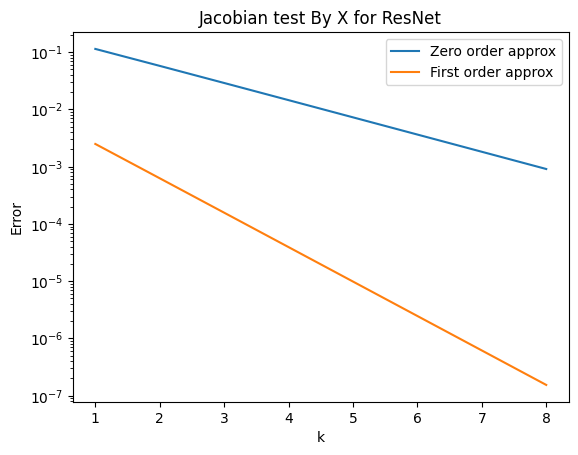

In [ ]:
def jacobian_test_res_X():
  # Jacobian Check Setup
  num_classes = 3
  input_size = 2
  num_features = num_classes
  EPSILON = 0.1
  W1 = np.random.randn(num_classes, num_features + 1)
  W2 = np.random.randn(num_classes, num_features )
  X = np.random.randn(num_features, input_size)
  d = np.random.randn(num_features, input_size)
  u = np.random.randn(num_classes, input_size)


  def F(X):
      A = np.vstack([X, np.ones((1, X.shape[1]))])
      return single_step_forward_res(A, W1, W2, tanh)

  def g_F(X):
      return np.dot(u.flatten(), F0.flatten())

  def jaco(X):
      A = np.vstack([X, np.ones((1, X.shape[1]))])
      return JacobianT_X_Res(A, W1, W2, u, tanh)

  F0 = F(X)
  g0 = g_F(X)
  grad_g0 = jaco(X)


  y0 = np.zeros(8)
  y1 = np.zeros(8)


  print("k\terror order 1 \t\t\t error order 2")
  for k in range(1, 9):
      epsk = EPSILON * (0.5 ** k)
      fk = F(X + (epsk * d))
      gk = np.dot(fk.flatten(), u.flatten())
      g1 = g0 + (epsk * (np.dot(d.flatten(),grad_g0.flatten())))
      y0[k - 1] = abs(gk - g0)
      y1[k - 1] = abs(gk - g1)
      print(f"{k}\t{y0[k-1]}\t{y1[k-1]}")

  # Plotting
  plt.semilogy(range(1, 9), y0, label="Zero order approx")
  plt.semilogy(range(1, 9), y1, label="First order approx")
  plt.legend()
  plt.title("Jacobian test By X for ResNet")
  plt.xlabel("k")
  plt.ylabel("Error")
  plt.show()

jacobian_test_res_X()

# **the complete network:**

**Forward pass**

In [ ]:
def forward_pass(network, X, activation='relu', res_places=[]):
    activation_func = relu if activation == 'relu' else tanh
    cache = {'A0': X}
    A = X
    L = len(network) - (len(res_places))
    for i in range(1, L):
        # bias
        A_aug = np.vstack([A, np.ones((1, A.shape[1]))])
        # resNet
        if i-1 in res_places:
            W1 = network['W' + str(i)+'_res1']
            W2 = network['W' + str(i)+'_res2']
            A = single_step_forward_res(A_aug, W1, W2, activation)

        # classic
        else:
            W = network['W' + str(i)]
            A = single_step_forward_class(A_aug, W , activation)

        # caching
        cache['A' + str(i)] = A

    #last layer
    A_aug = np.vstack([A, np.ones((1, A.shape[1]))])
    A = softmax(network['W' + str(L)].dot(A_aug))
    cache['A' + str(L)] = A

    return A, cache


 **Back Propagation**

In [ ]:
def backpropagation(gradients,network, cache, Y, res_places = [], activation='relu'):
    activation_func = relu if activation == 'relu' else 'tanh'

    L = len(network) - (len(res_places))
    A = cache['A' + str(L - 1)]
    A = np.vstack([A, np.ones((1, A.shape[1]))])
    W_prime = softmax_regression_gradient_by_W(A ,network['W'+str(L)], Y)
    gradients['W'+str(L)] = W_prime
    dA =  softmax_regression_gradient_by_X(A ,network['W'+str(L)], Y)
    dA = dA[:-1,:]

    for i in reversed(range(1, L)):
        A = cache['A'+str(i-1)]
        A_aug = np.vstack([A, np.ones((1, A.shape[1]))])

        #resBack
        if i - 1 in res_places:
            W1 = network['W'+str(i)+'_res1']
            W2 = network['W'+str(i)+'_res2']

            W1_prime = JacobianT_W1_Res(A_aug, W1, W2, dA, activation)
            gradients['W'+str(i)+'_res1'] = W1_prime

            W2_prime = JacobianT_W2_Res(A_aug, W1, W2, dA, activation)
            gradients['W'+str(i)+'_res2'] = W2_prime

            dA = JacobianT_X_Res(A_aug, W1, W2, dA, activation)

        #clasicBack
        else:
            W = network['W'+str(i)]
            W_prime = JacobianTByW(A_aug, W, dA, activation)
            gradients['W'+str(i)] = W_prime
            dA = JacobianTByX(A_aug, W, dA, activation)
            dA = dA[:-1,:]

    return gradients

1	0.03036599648247984	0.0049682761798529596
2	0.016571981632720223	0.0010951546984462324
3	0.008580403875711018	0.00025316428987220974
4	0.004356189726214432	6.0594356577126085e-05
5	0.002193587158025423	1.4804883370356237e-05
6	0.0011005381428672578	3.6578778306317616e-06
7	0.0005511889775954293	9.090327535155041e-07
8	0.00027582242567669724	2.265794978306701e-07


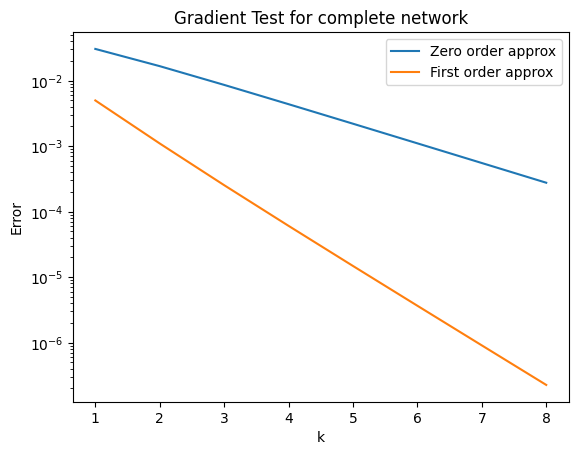

In [ ]:
def Gradient_test_for_complete_network():
    # Gradient test SetUp
    layer_sizes = [2,4,4,4,4,4,4,2]
    res_places = [1,2,3,4,5]
    batchSize = 3
    gradients = {}
    EPSILON = 0.1
    network = initialize_network(layer_sizes, res_places)
    X , C =pickRandomBach(data_training_X,data_training_C,batchSize)

    # Generate a random vector d for each layer
    d = {layer: np.random.randn(network[layer].shape[0], network[layer].shape[1]) for layer in network}

    def F(network):
      A , cache = forward_pass(network, X, 'tanh', res_places)
      return  compute_loss(A,C) , cache

    def g_F(network , cache):
      return backpropagation(gradients, network, cache, C, res_places, 'tanh')

    F0, cache = F(network)
    g0 = g_F(network , cache)
    y0 = np.zeros(8)
    y1 = np.zeros(8)

    for k in range(1, 9):
        epsk = EPSILON * (0.5 ** k)
        # Perturb weights by epsk * d
        W_original = {layer: np.copy(network[layer]) for layer in network}
        for layer in network:
            network[layer] += epsk * d[layer]

        Fk,_ = F(network)
        temp = 0
        for key in g0:
            temp += np.sum(g0[key] * (epsk * d[key]))
        F1 = F0 + temp
        y0[k-1] = abs(Fk - F0)
        y1[k-1] = abs(Fk - F1)
        # Reset weights
        for layer in network:
            network[layer] = W_original[layer]

        print(f"{k}\t{y0[k-1]}\t{y1[k-1]}")
    # Plotting
    plt.semilogy(range(1, 9), y0, label="Zero order approx")
    plt.semilogy(range(1, 9), y1, label="First order approx")
    plt.legend()
    plt.title("Gradient Test for complete network")
    plt.xlabel("k")
    plt.ylabel("Error")
    plt.show()

Gradient_test_for_complete_network()

# **Part 2.1.4**

In [ ]:
def plot_training_results_extended(lossesList, successList, avg_lossesList, avg_successList):
    plt.figure(figsize=(14, 7))

    # Plotting the losses per batch
    plt.subplot(2, 2, 1)
    plt.plot(lossesList, label='Loss per Batch', color='blue')
    plt.title('Loss per Batch')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()

    # Plotting the success percentage per batch
    plt.subplot(2, 2, 2)
    plt.plot(successList, label='Success % per Batch', color='green')
    plt.title('Success % per Batch')
    plt.xlabel('Iterations')
    plt.ylabel('Success %')
    plt.grid(True)
    plt.legend()

    # Plotting the average losses per epoch
    plt.subplot(2, 2, 3)
    plt.plot(avg_lossesList, label='Average Loss per Epoch', color='red')
    plt.title('Average Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Average Loss')
    plt.grid(True)
    plt.legend()

    # Plotting the average success percentage per epoch
    plt.subplot(2, 2, 4)
    plt.plot(avg_successList, label='Average Success % per Epoch', color='purple')
    plt.title('Average Success % per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Success %')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
def train_network(X, Y, print_train_process, batchSize, network, res_places, num_epochs=1, learning_rate=0.05, momentum=0.9, activation='relu'):
    lossesList = []
    successList = []
    avg_lossesList = []
    avg_successList = []
    for epoch in range(num_epochs):
        avg_lossesList_it = []
        avg_successList_it = []
        if print_train_process:
            print(f'Epoch {epoch + 1}')

        for X_batch, Y_batch in shuffle_and_batch(X, Y, batchSize):
            velocity = {key: np.zeros_like(val) for key, val in network.items()}
            gradients = {}
            A, cache = forward_pass(network, X_batch, activation, res_places)
            gradients = backpropagation(gradients, network, cache, Y_batch, res_places, activation)
            SGD_with_momentum(network, gradients, velocity, learning_rate, momentum)
            avg_lossesList_it.append(compute_loss(A, Y_batch))
            avg_successList_it.append(calculate_success_percentage(A ,Y_batch))

        lossesList.append(compute_loss(A, Y_batch))
        successList.append(calculate_success_percentage(A ,Y_batch))
        avg_lossesList.append(np.mean(avg_lossesList_it))
        avg_successList.append(np.mean(avg_successList_it))

    return network, lossesList, successList, avg_lossesList,avg_successList

In [ ]:
def data_validation_test(network, res_places):
    A, _ = forward_pass(network, data_validation_X, 'relu', res_places)
    loss = compute_loss(A ,data_validation_C)
    success = calculate_success_percentage(A,data_validation_C)
    return loss, success

In [ ]:
def res_indices(layer_sizes):
    index_dict = {}
    for idx, value in enumerate(layer_sizes):
        if value in index_dict:
            index_dict[value].append(idx)
        else:
            index_dict[value] = [idx]
    repeating_indices = []

    for indices in index_dict.values():
        if len(indices) > 1:
            repeating_indices.extend(indices[:-1])

    if 0 in repeating_indices:
        repeating_indices.remove(0)

    return repeating_indices

(0.14167901902193208, 96.74000000000001)


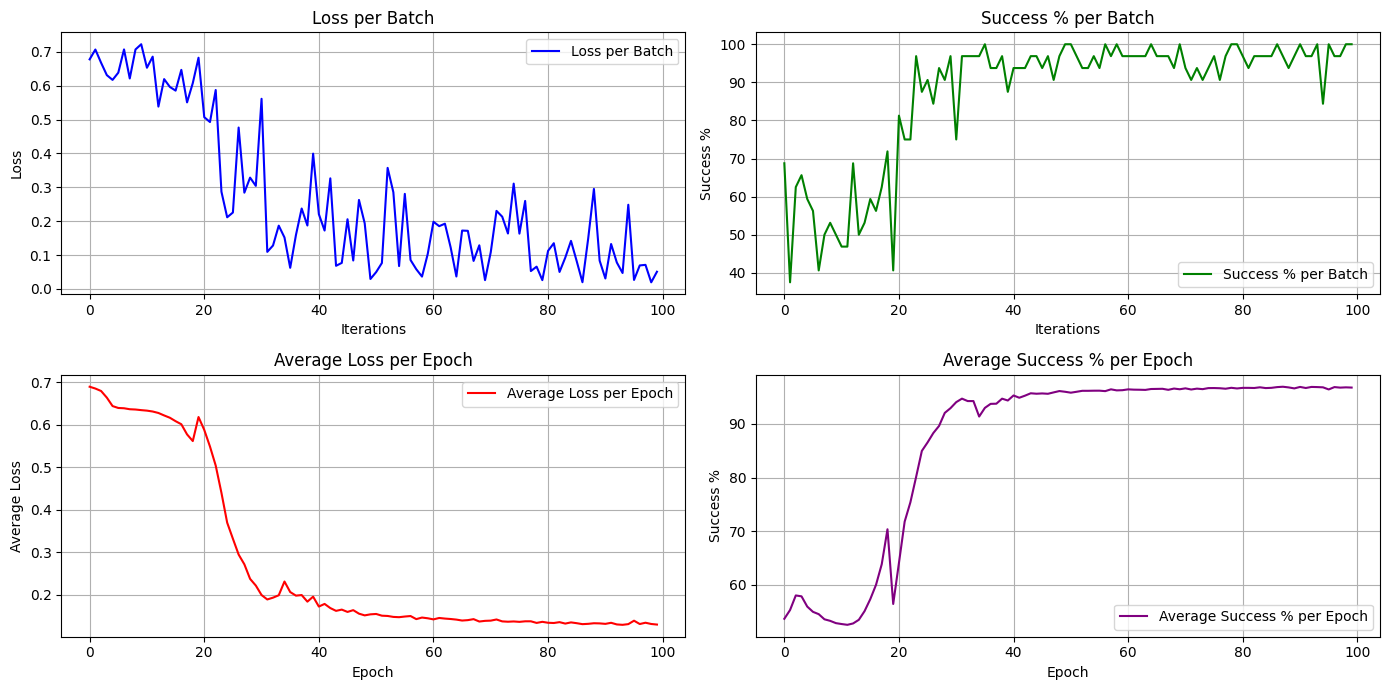

In [ ]:
def Set_ENV_train_network(X, C, layer_sizes, res_places ,batchSize, num_epochs, learning_rate, momentum, activation='relu', print_train_prosses=False):
  network = initialize_network(layer_sizes, res_places)
  network, lossesList, successList , avg_lossesList,avg_successList = train_network(X, C, print_train_prosses, batchSize, network, res_places, num_epochs, learning_rate , momentum , activation)
  return network ,lossesList, successList, avg_lossesList,avg_successList

layer_sizes = [2,12,12,12,2]
res_places = res_indices(layer_sizes)
batchSize = 64
num_epochs = 100
learning_rate = 0.09
momentum = 0.2
activation = 'relu'
print_train_prosses = False
X = data_training_X
C = data_training_C

network_fin, lossesList, successList , avg_lossesList,avg_successList = Set_ENV_train_network(X, C, layer_sizes, res_places ,batchSize, num_epochs, learning_rate, momentum, activation, print_train_prosses)

print(data_validation_test(network_fin, res_places))
plot_training_results_extended(lossesList, successList, avg_lossesList, avg_successList)